# importing packages


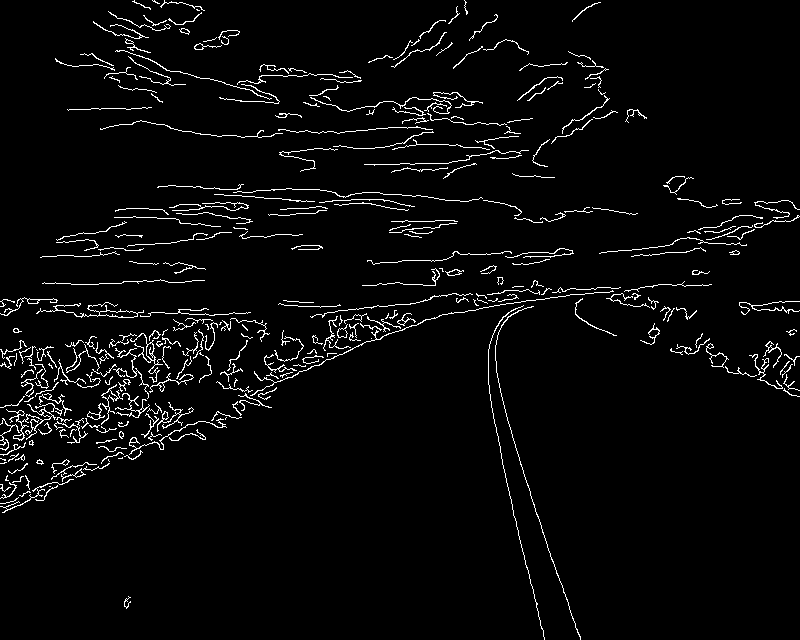

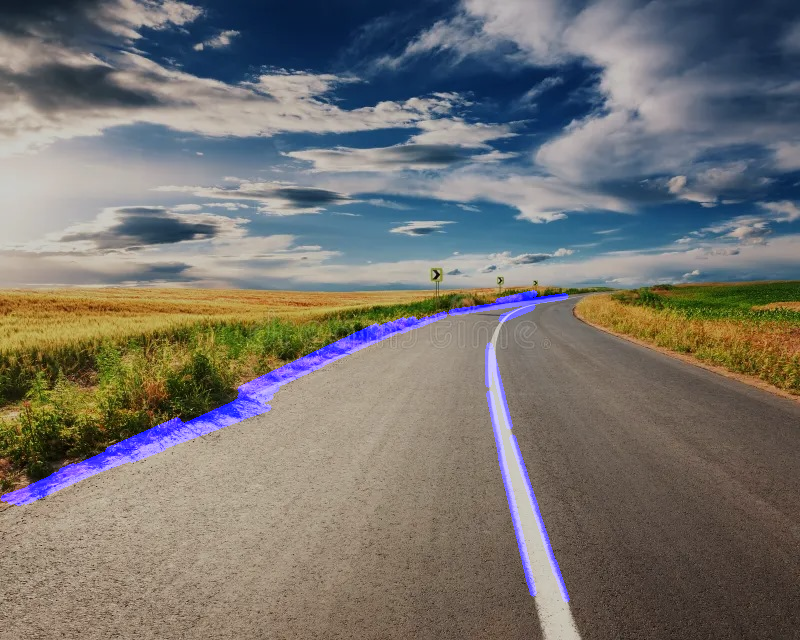

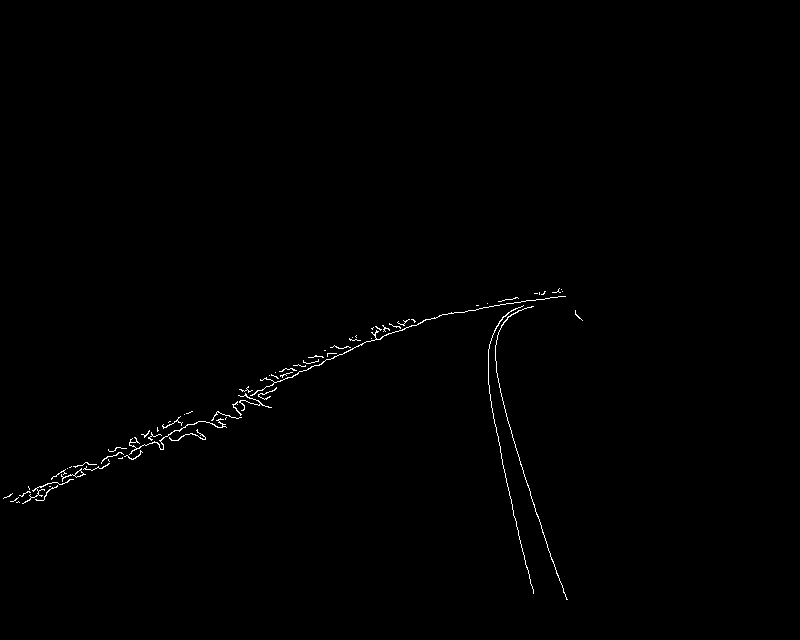

In [52]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def apply_roi_mask(image, points):
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, points, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

def detect_lines(image, rho, theta, threshold, min_length, max_gap):
    detected_lines = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength=min_length, maxLineGap=max_gap)
    return detected_lines

def render_lines(image, lines, color=[255, 0, 0], thickness=5):
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(image, (x1, y1), (x2, y2), color, thickness)

def process_image(image_path):
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Could not load image.")
        return

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)
    edge_image = cv2.Canny(blurred_image, 50, 150)

    roi_points = np.array([[
        (0, image.shape[0] * 0.78),
        (image.shape[1], image.shape[0]),
        (int(image.shape[1] * 0.7), int(image.shape[0] * 0.45)),
        (int(image.shape[1] * 0.47), int(image.shape[0] * 0.51))
    ]], dtype=np.int32)

    roi_image = apply_roi_mask(edge_image, roi_points)
    lines = detect_lines(roi_image, rho=1, theta=np.pi / 180, threshold=30, min_length=0, max_gap=30)

    line_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    render_lines(line_image, lines)

    result_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

    cv2_imshow(edge_image)
    cv2_imshow(result_image)
    cv2_imshow(roi_image)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

image_path = '/content/sample_data/WhatsApp Image 2024-09-08 at 16.27.45_d07b1d5e.jpg'
process_image(image_path)
